# World's Gross Domestic Product (GDP) Exploration
### by Hassanat Awodipe

## Content

1. <a href="#Introduction">Introduction</a> 
2. <a href="#Preliminary-Wrangling">Preliminary Wrangling</a>  
    2\.1\. <a href="#Assessing">Assessing</a>  
    2\.2\. <a href="#Structure-of-the-dataset">Structure of the dataset</a>
3. <a href="#Univariate-Exploration">Univariate Exploration</a>  
    3\.1\. <a href="#univariate-conclusion">Conclusion</a>
4. <a href="#Bivariate-Exploration">Bivariate Exploration</a>  
    4\.1\. <a href="#bivariate-conclusion">Conclusion</a>
5. <a href="#Multivariate-Exploration">Multivariate Exploration</a>  
    5\.1\. <a href="#multivariate-conclusion">Conclusion</a>
6. <a href="#Conclusions">Conclusion and Limitations</a>


## Introduction
<a id="optparam"></a>

> Gross Domestic Product (GDP) is the total income accrued from goods and services produced in a country for a given period of time. The aim of the analysis is to understand the effect of population on GDP and by extension, Income Class. The other factors that affect GDP such as imports, exports, etc were also taken into consideration.
>
> The dataset was gotten from [kaggle](https://www.kaggle.com/datasets/truecue/worldsustainabilitydataset?select=WorldSustainabilityDataset.csv) and it was compiled from World bank. It contained two tables: **World Sustainability dataset** which contained the economic data of countries in the world from 2000 t0 2018 and the **Data dictionary** which described the features in the table.

## Preliminary Wrangling
<a id="optparam"></a>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
economy = pd.read_excel('Dataset/WorldSustainabilityDataset-Economy.xlsx')
economy.head()

,Country Name,Country Code,Year,Exports,Gross national expenditure,GDP,Gross savings,Inflation,Imports,Total natural resources rents,Income Class,Population,Rural population,Urban population,Regions
0,Aruba,ABW,2001,70.497527,98.050626,1.920112e+09,19.327902,2.883604,68.548152,0.000712,High income,92892,53.661,46.339,Latin America and Caribbean
1,Aruba,ABW,2002,64.920863,104.460432,1.941341e+09,12.016691,3.315247,69.381295,0.000657,High income,94992,54.028,45.972,Latin America and Caribbean
2,Aruba,ABW,2003,63.101161,107.766722,2.021229e+09,14.461857,3.656365,70.867883,0.000700,High income,97016,54.394,45.606,Latin America and Caribbean
3,Aruba,ABW,2004,65.078967,103.484583,2.228492e+09,17.096515,2.529129,68.563550,0.000685,High income,98744,54.760,45.240,Latin America and Caribbean
4,Aruba,ABW,2005,68.552253,109.395973,2.330726e+09,-2.041702,3.397787,77.948226,0.000653,High income,100028,55.125,44.875,Latin America and Caribbean


- `Country Name`and `Country Code` are the names and codes of the coutnries

- `Year` is the year the data was recorded

- `Exports` expressed as a % of GDP, represents the value of all goods and other market services provided to the rest of the world

- `Gross national expenditure` expressed as a % of GDP, sum of household final consumption expenditure, general government final consumption expenditure, and gross capital formation

- `GDP` value (in USD) of total goods and services produced within a country. 

- `Gross savings` expressed as a % of GDP, gross national income less total consumption, plus net transfers

- `Inflation` annual change in % at which prices of goods and services brought by conusmers rise or fall. Estimated by using consumer price indices

- `Imports` expressed as a % of GDP, value of all goods and other market services received from the rest of the world

- `Total natural resources rents` % is the income accrued from natural resources (e.g. Exports) as a percentage of GDP

- `Income Class` defines the economy of the country as defined by World bank 

- `Population` the number of people in the country at that time

- `Rural population` the perecentage of people living in the rural areas

- `Urban population` the perecentage of people living in the urban areas

- `Regions` the countries Region as classified by United Nations.

### Assessing
<a name="Assessing"></a>

In [3]:
# number of unique countries
economy['Country Name'].nunique()

172

In [4]:
# summary of data columns and rows
economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   3073 non-null   object 
 1   Country Code                   3073 non-null   object 
 2   Year                           3073 non-null   int64  
 3   Exports                        2954 non-null   float64
 4   Gross national expenditure     2889 non-null   float64
 5   GDP                            3073 non-null   float64
 6   Gross savings                  2648 non-null   float64
 7   Inflation                      2923 non-null   float64
 8   Imports                        2954 non-null   float64
 9   Total natural resources rents  3053 non-null   float64
 10  Income Class                   3073 non-null   object 
 11  Population                     3073 non-null   int64  
 12  Rural population               3073 non-null   f

 > There are null values in the dataset. I will replace them with the respective mean values of the affected columns

In [5]:
# replace null values in each column with the mean values of that column
cols_with_nulls = ['Exports', 'Gross national expenditure', 'Gross savings', 'Inflation', 'Imports', 'Total natural resources rents']
for each_column in cols_with_nulls:
    economy[each_column].fillna(economy[each_column].mean(), inplace=True)
    
economy.isnull().sum().any()

False

In [6]:
# convert the df to csv so it can be used for the slides preparation
#economy.to_csv('WorldGDP.csv', index=False)

> Now, I would like to understand the descriptive statistics

In [7]:
# summary descriptive statistics
economy.describe()

,Year,Exports,Gross national expenditure,GDP,Gross savings,Inflation,Imports,Total natural resources rents,Population,Rural population,Urban population
count,3073.000000,3073.000000,3073.000000,3.073000e+03,3073.000000,3073.000000,3073.000000,3073.000000,3.073000e+03,3073.000000,3073.000000
mean,2009.468597,42.286469,104.566075,3.598009e+11,22.779667,5.366414,47.168952,7.015880,3.908210e+07,42.782066,57.217934
std,5.184525,29.335846,18.049911,1.429281e+12,16.469995,9.681498,27.268984,10.695933,1.421234e+08,22.779309,22.779309
min,2001.000000,0.099465,40.110847,1.811170e+08,-70.263214,-18.108630,0.064705,0.000000,6.967100e+04,0.000000,8.461000
25%,2005.000000,24.595068,97.051308,7.034111e+09,16.182848,1.730800,29.390097,0.393718,2.314901e+06,24.432000,39.248000
50%,2009.000000,36.940811,103.773352,2.622423e+10,22.779667,3.675919,41.857961,2.153934,8.171950e+06,42.617000,57.383000
75%,2014.000000,51.519098,111.150617,1.843880e+11,26.888327,6.588360,58.016053,8.829187,2.628619e+07,60.752000,75.568000
max,2018.000000,228.993771,264.782066,2.061190e+13,372.988127,359.936614,236.390969,81.949962,1.392730e+09,91.539000,100.000000


> Examining the columns which have negative values for `Gross savings` and `Inflation`.

In [8]:
# gross savings below 0
economy[economy['Gross savings'] <= 0]['Income Class'].unique()

array(['High income', 'Low income', 'Upper-middle income',
       'Lower-middle income'], dtype=object)

In [9]:
# inflation below 0
economy[economy['Inflation'] <= 0]['Income Class'].unique()

array(['High income', 'Upper-middle income', 'Lower-middle income',
       'Low income'], dtype=object)

> `Negative Gross savings` and `Negative inflation or deflation` seemed to have been recorded in a number of countries regardless of the `Income Class`. Negative gross savings is when the country saves less than it normally would and deflation is when there is a decrease in the prices of goods and services, excees supply or increase in buying power of consumers.

As a final wrangling step, I will change the `Income Class` to an ordered category data type. I have not bothered to change the data type for the year because it will not affect the analysis.

In [10]:
# create an order for income class
income_class = ['High income', 'Upper-middle income', 'Lower-middle income', 'Low income']
income_order = pd.api.types.CategoricalDtype(ordered=True, categories=income_class)
economy['Income Class'] = economy['Income Class'].astype(income_order)

In [11]:
# nominal categorical variable
economy['Regions'].unique()

array(['Latin America and Caribbean', 'Sub-Saharan Africa',
       'Europe and Northern America', 'Northern Africa and Western Asia',
       'Oceania', 'Central and Southern Asia',
       'Eastern and South-Eastern Asia'], dtype=object)

In [12]:
# check the years that the data was colected
economy['Year'].min(), economy['Year'].max()

(2001, 2018)

### Structure of the dataset
<a name="Structure-of-the-dataset"></a>

> There are 3073 observations of 16 economic features for 172 unique countries over a period of 17 years.
>
> Most of the variables are numeric except the `country name and code, income class and region`. The numeric variables are expressed as a percentage of the GDP except otherwise stated. Income class and Regions are the only categorical variables in the dataset with Income Class being ordinal. There is also the Year column.
>
> There are 7 region types: `Latin America and Caribbean, Sub-Saharan Africa, Europe and Northern America, Northern Africa and Western Asia, Oceania, Central and Southern Asia, Eastern and South-Eastern Asia`. And four income classes: `High income > Upper-middle income > Lower-middle income > Low income`

### Main feature(s) of interest in the dataset

> The main features in the dataset are the Population, GDP and Income class. I am interested in looking at the world's GDP as a whole. I want to understand how Population affects GDP and how GDP varies with Income Class. The more the people, the more the goods and services produced in the country and the more the GDP. Especially if they are located in the Urban region of the country. This then determines the Income Class

### Features that support the investigation of the feature(s) of interest

> Exports, Imports, Total natural resources rents, and Gross savings and National expendtiure will also have some effect on the amount of GDP and may not make the GDP-Population-Income Class relationship a linear one.

## Univariate Exploration
<a id="optparam"></a>

### What is the distribution of  GDP?

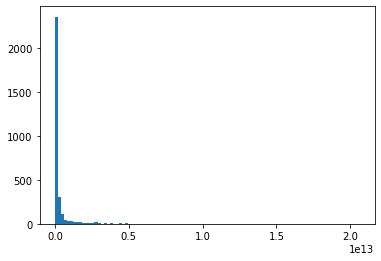

In [13]:
# distribution of GDP
bins = 100
plt.hist(economy['GDP'], bins=bins);

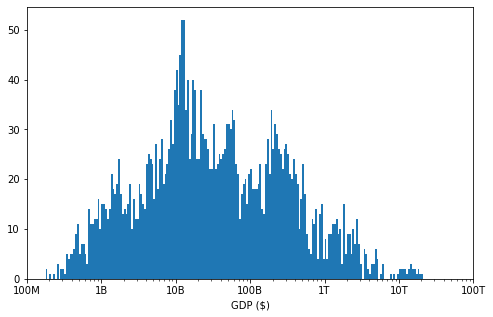

In [14]:
# adjust the scale to a log scale
plt.figure(figsize=[8, 5])

log_binsize = 0.025
bins = 10 ** np.arange(0.9, np.log10(economy['GDP'].max())+log_binsize, log_binsize)

plt.hist(economy['GDP'], bins=bins)
plt.xscale('log')
plt.xlim(10**8, 10**14)
plt.xticks([10**8, 10**9, 10**10, 10**11, 10**12, 10**13, 10**14], ['100M', '1B', '10B', '100B', '1T', '10T', '100T'])
plt.xlabel('GDP ($)')

plt.show()

GDP has a long tail with a lot of smaller values and just a few values on the high side. When plotted on a log scale, the distribution appears to be normal with the highest count of GDPs in 10B range. There also appears to be more values after the 10B range.

Exports is one of the contributing factors to GDP. If a country exports more than it imports, it would have a high GDP but if it imports more than it exports, it would have a low GDP according to the [Export-led growth Theory](https://smartech.gatech.edu/bitstream/handle/1853/51636/final.pdf).

### What is the distribution of  Exports?

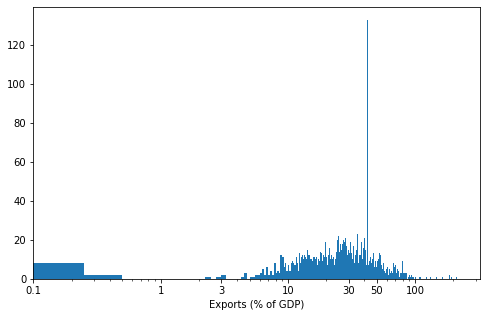

In [15]:
# distribution of exports
plt.figure(figsize=[8, 5])

bins= np.arange(0, economy['Exports'].max()+0.25, 0.25)
plt.hist(economy['Exports'],  bins=bins);
plt.xscale('log')
ticks = [0.1, 1, 3, 10, 30, 50, 100]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.xlabel('Exports (% of GDP)')

plt.show()

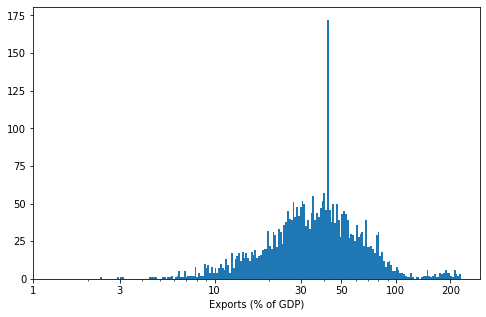

In [16]:
# there is a distribution of a smaller percentage of export less than 1%
# I will closely examine those above 2%
plt.figure(figsize=[8, 5])

log_binsize = 0.010
bins = 10 ** np.arange(0.3, np.log10(economy['Exports'].max())+log_binsize, log_binsize)

plt.hist(economy['Exports'], bins=bins)
plt.xscale('log')
ticks = [1, 3, 10, 30, 50, 100, 200]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.xlabel('Exports (% of GDP)')

plt.show()

The distribution of Exports seems to fall into two groups: values less than 5% and values above, although the former seems more like outliers. The Export values when plotted on a log scale are normally distributed with a lot of values between 40 and 50%. There is an abnormally high count of 175 and this is due to null rows that were filled with mean values.

Next, I will look at Total natural resources rents which shows the income accured from natural resources produced in the country. Like Exports, this tend to increase the GDP.

### What is the distribution of the Total Natural Resources?

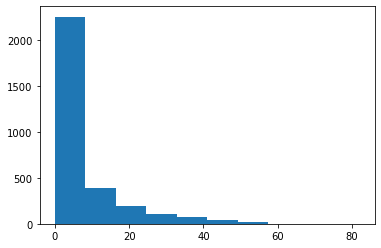

In [17]:
# similarly to the GDP distribution, this also has a long tail
plt.hist(economy['Total natural resources rents']);

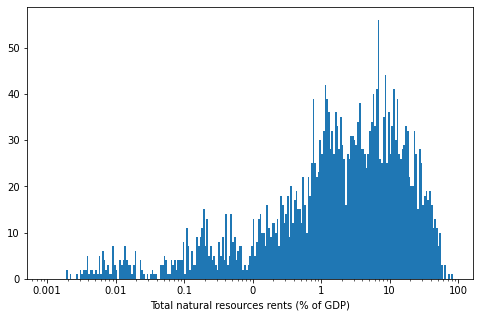

In [18]:
# adjust to a log scale
log_binsize = 0.025
bins = 10 ** np.arange(-4, (np.log10(economy['Total natural resources rents'].max())+log_binsize), log_binsize)

plt.figure(figsize=[8, 5])

plt.hist(economy['Total natural resources rents'], bins=bins);
plt.xscale('log')
plt.xticks([10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2], [0.001, 0.01, 0.1, 0, 1, 10, 100])
plt.xlabel('Total natural resources rents (% of GDP)')

plt.show()

When converted to a log scale, the distribution of Total natural resources becomes left skewed. We can also see a tall bar indicating a high distribution of nulls filled with mean values. A higher proportion of the distribution falls below the 10% range of GDP. It seems like a lot of countries do not gain so much from Total natural resources. 

Import is another factor that affects the GDP of a country. I would like to check the distribution of imports

### What is the distribution of the Imports?

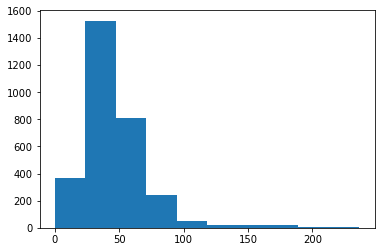

In [19]:
# it has a fairly long tail
plt.hist(economy['Imports']);

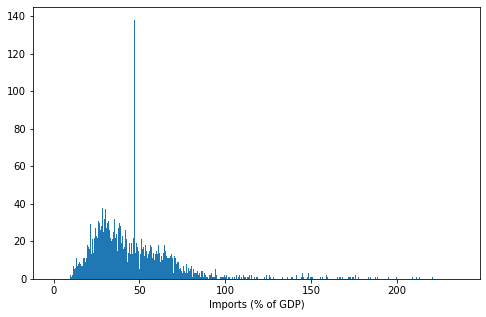

In [20]:
# increase the bin size
plt.figure(figsize=(8,5))

bins = 600
plt.hist(economy['Imports'], bins=bins);
plt.xlabel('Imports (% of GDP)');

A higher proportion of the distribution of imports is less than 50%. Contrary to the exports distribution, the outliers are on the right indicating that fewer countries spend more on Imports. But these few countries really spend a lot, as much as 200% of their GDP. Again, the tall bar indicates null values filled with the mean.


### What is the distribution of Gross National Expenditure?

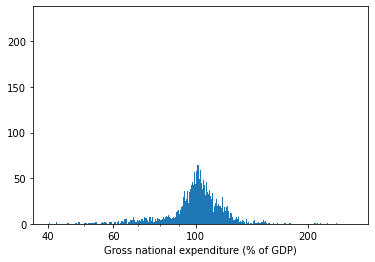

In [21]:
# using a bin size of 500.
bins = 500 
economy['Gross national expenditure'].hist(bins = 500)
plt.xscale('log')
plt.xticks([4*10**1, 6*10**1, 10**2, 2*10**2], [40, 60, 100, 200])
plt.grid(False)
plt.xlabel('Gross national expenditure (% of GDP)')

plt.show()

The distribution of gross national expenditure is narrowly normal. A high proportion of national expenditure is 100% GDP indicating that final consumpion, household expenditure and government general expenditure is as high as GDP. Gross national expendtiure is usually seen as a positive contributor to GDP.

### What is the distribution of Gross Savings?

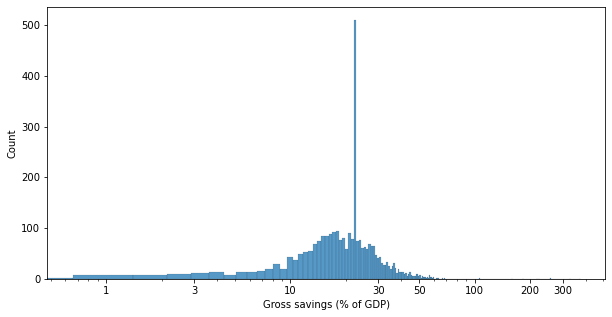

In [22]:
# using a seaborn plot
plt.figure(figsize=(10,5))
    
sb.histplot(economy['Gross savings'], bins=600);
plt.xscale('log')

ticks = [1, 3, 10, 30, 50, 100, 200, 300]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.xlabel('Gross savings (% of GDP)');

A lot of values for gross savings are around 20% of the corresponding GDP. The histogram does not seem to capture the negative gross savings values. Gross savings is generally less than expenditure.

### What is the distribution of  Inflation?

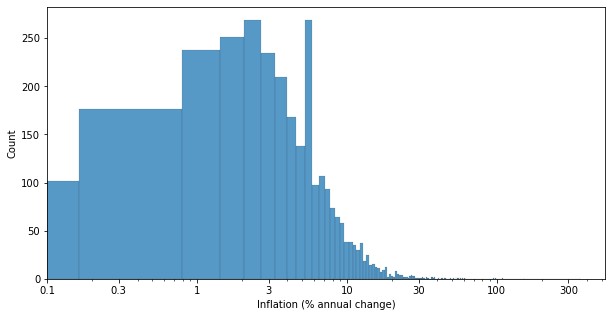

In [23]:
# using a seaborn plot
plt.figure(figsize=(10,5))

sb.histplot(economy['Inflation'], bins=600)
plt.xscale('log')
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.xlabel('Inflation (% annual change)');

Inflations values are commonly low with a few high outliers from 30%. The most common values for is around 2%. Again, the histogram does not seem to capture the negative gross savings values. The thin, tall bar between 3% and 10% accounts for the null values filled with the mean.

### What is the distribution of population?

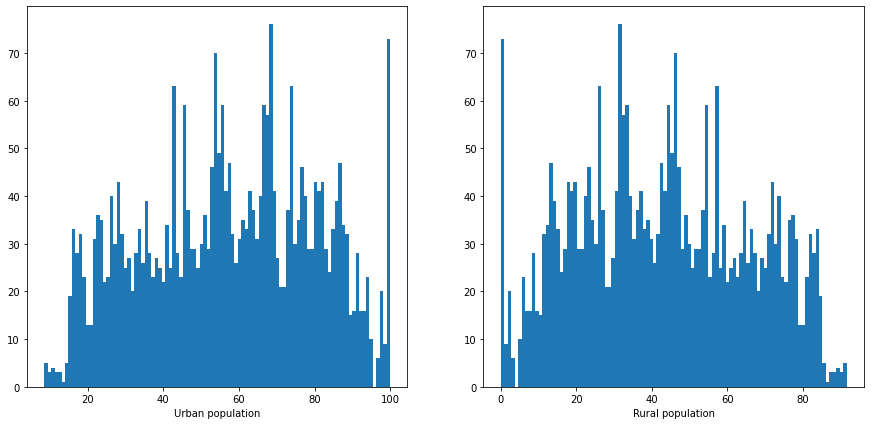

In [24]:
# use urban and rural population
plt. figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.hist(economy['Urban population'], bins=100);
plt.xlabel('Urban population');

plt.subplot(1, 2, 2)
plt.hist(economy['Rural population'], bins=100);
plt.xlabel('Rural population');

The urban and rural population distributions have an inverted relationship. This is because they are expressed as a precentage of the overall population and add up to 100. It appears that there are countries with no rural population and most countires have a ratio of 65:35 for their urban-rural ratio.

Finally, I will plot countplots to check the distribution of the two categorical variables.

### What is the distribution of Income Class?

In [25]:
# choose a uniform color for the bars
base_color = sb.color_palette()[0]

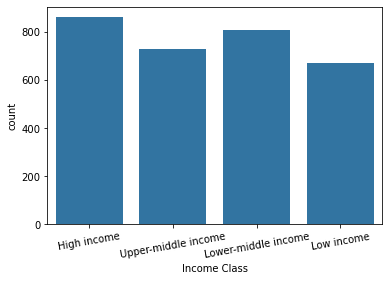

In [26]:
# distribution of income class
sb.countplot(data=economy, x='Income Class', color=base_color);
plt.xticks(rotation=10)

plt.show()

Interestingly, there are a lot more high income observations in the dataset than the other income classes. Also, if the numbers of high income and upper-middle income classes are added together, it would exceeed that of lower-middle income and low-income. Does this then make the world a place with generally high income? 

Next, I would like to examine the distribution of countries across the Regions.

### What is the distribution of Regions?

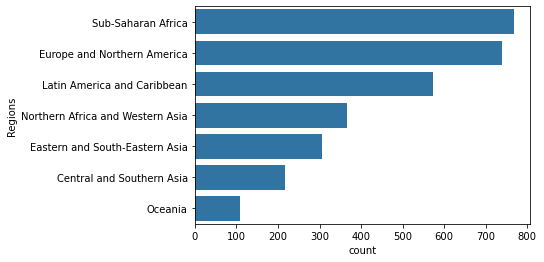

In [27]:
# distribution of regions
sb.countplot(data=economy, y='Regions', color=base_color, order=economy['Regions'].value_counts().index);

Sub-Saharan Africa is the region with the highest count of observations in the dataset while Oceania has the lowest number of observations. 

### Conclusion
<a name="univariate-conclusion"></a>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> GDP, Population and Income Class are the variables of interets. There are more high income and upper middle income observations than there are low income and lower middle income observations in the dataset (assuming the countries are **not** uniquely counted). The GDP had a wide range of values so I used a log transformation. This resulted in a normal distribution with higher proportion of values around the 10B range. There is a high ratio of 65:35 for urban-rural population.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most of the variables required a log transformation as they had long tails either to the left or right of the axis. It was interesting to see that the world spends more on imports than it gains from exports. And that there is little income gotten  from natural resources. Also, there was a record of 300% inflation rate.

> The filling of null values with the mean values was clearly evident as some bars were abnormally tall and this distorted the overall view of the histogram. I carried out an initial analysis in which the null values were not replaced to better understand the distribution.

## Bivariate Exploration
<a id="optparam"></a>

### What is the relationship between GDP and the other numeric variables?

In [28]:
# split the numeric variables into two groups: those that add to the GDP and those that do not add to the GDP. 
add_GDP = ['GDP', 'Exports', 'Gross national expenditure', 'Total natural resources rents', 'Population']

minus_GDP = ['GDP', 'Imports', 'Gross savings', 'Inflation']

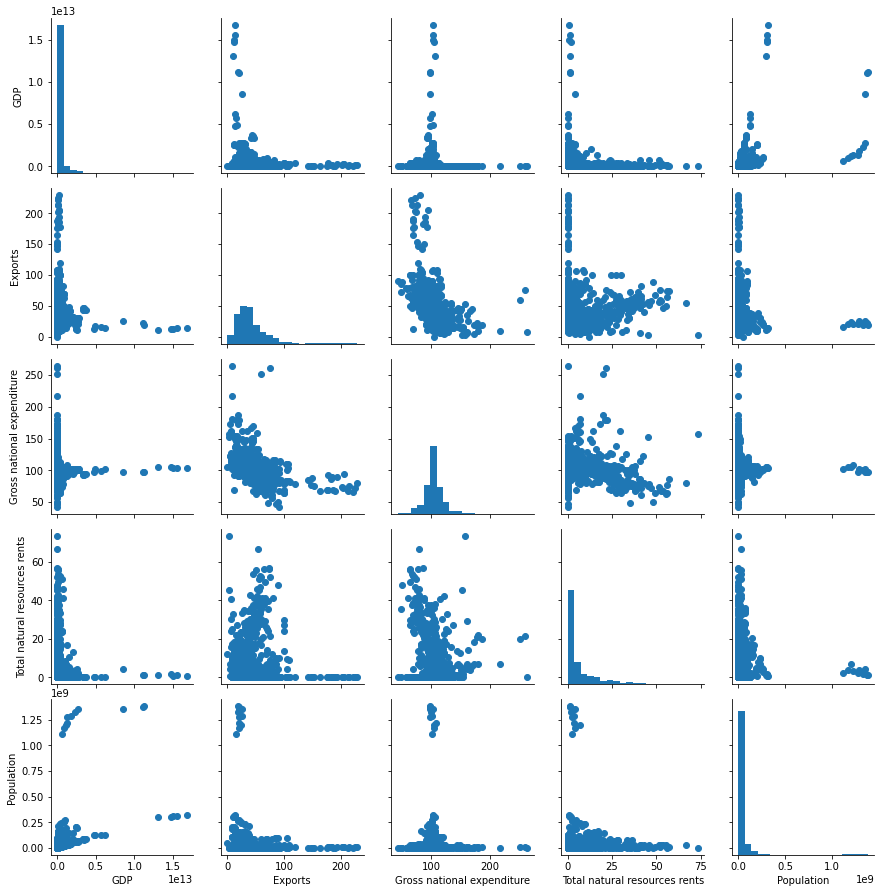

In [29]:
# variables that add to the GDP
# using a random sample of the data
samples = np.random.choice(economy.shape[0], 1000, replace = False)
economy_samp = economy.loc[samples,:]

g = sb.PairGrid(data = economy_samp, vars = add_GDP)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

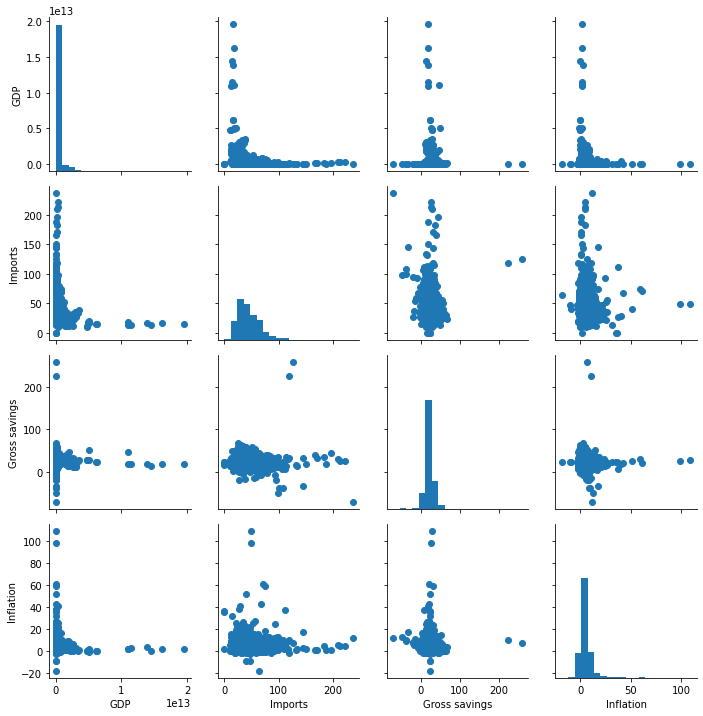

In [30]:
# variables that do not add to the GDP
# using a random sample of the data
samples = np.random.choice(economy.shape[0], 1000, replace = False)
economy_samp = economy.loc[samples,:]

g = sb.PairGrid(data = economy_samp, vars = minus_GDP)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

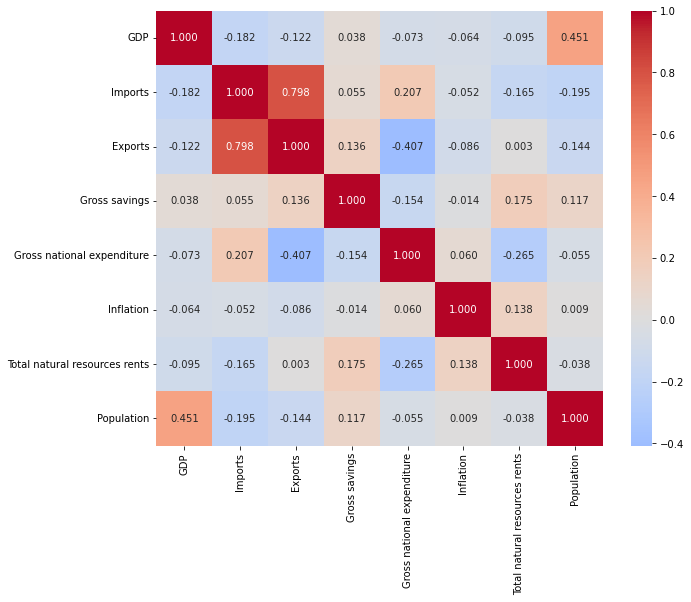

In [31]:
# consider all the numeric features in the dataset and how they compare to GDP
all_vars = ['GDP', 'Imports', 'Exports', 'Gross savings', 'Gross national expenditure', 'Inflation', 
                'Total natural resources rents', 'Population']

plt.figure(figsize = [10, 8])

sb.heatmap(economy[all_vars].corr(), annot = True, fmt = '.3f', center = 0, cmap='coolwarm')

plt.show()

The first pair grid shows that there is a linear correlation between GDP and Population. The relation of GDP with exports, gross national expenditure or natural resources is not exactly clear.

Looking at the plots of population with other features, the features tend to have a negative correlation except inflation that shows negative correlation. There seemed to be a negative relation between exports and natural expenditure.

It was hard to understand the plots in the second plot grid so I examined all the numeric features using a heatmap. It was surprising to see that GDP had zero or negative correlation with a lot of the variables including Exports. This tell us that the relationship between GDP and the other numeric features may not be a linear one; it could be quadratic or cubic or one of the other forms of non linear relationship. 

Exports and Imports had a strong positive correlation as well as population and GDP albeit not as strong.

Next, I will check the performace of the GDP over the years as well as population growth.

### How has population growth affected GDP?

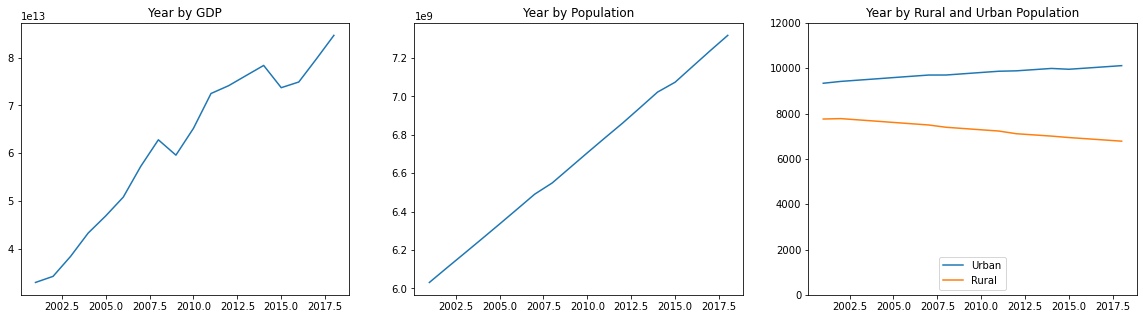

In [32]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(economy.groupby(['Year'])['GDP'].sum());
plt.title('Year by GDP');

plt.subplot(1, 3, 2)
plt.plot(economy.groupby(['Year'])['Population'].sum());
plt.title('Year by Population');

plt.subplot(1, 3, 3)
plt.plot(economy.groupby(['Year'])['Urban population'].sum(), label='Urban');
plt.plot(economy.groupby(['Year'])['Rural population'].sum(), label='Rural');
plt.ylim(0, 12000)
plt.title('Year by Rural and Urban Population');
plt.legend(loc='lower center');

Since 2001, there has been a steady rise in GDP. A slight drop occurred between mid-2007 and 2009. Then another drop in 2015. 

There was a linear increase in population from 2001 to 2018.

By examining based on Rural and Urban Population, we can see that the increase in GDP is related to that of urban population and is unaffected by the decline of Rural Population. Also interesting to see that the migration from Rural areas to Urban areas continues to grow.

I will now closely examine the rise and fall of GDP from 2010.

### How has GDP improved from 2010 to 2018

In [33]:
# pivot the years from 2010 into individual columns 
gdp_year = economy[['Country Name', 'GDP', 'Year']]
gdp_year = gdp_year.query('Year >= 2010' )
gdp_year.pivot(index='Country Name', columns='Year', values='GDP')

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,
Albania,1.192693e+10,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10
Algeria,1.612070e+11,2.000130e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.659790e+11,1.600340e+11,1.700970e+11,1.754150e+11
Angola,8.379950e+10,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11
Antigua and Barbuda,1.148700e+09,1.137637e+09,1.199948e+09,1.181448e+09,1.249733e+09,1.336693e+09,1.436585e+09,1.467978e+09,1.605352e+09
Argentina,4.236270e+11,5.301630e+11,5.459820e+11,5.520250e+11,5.263200e+11,5.947490e+11,5.575310e+11,6.436290e+11,5.176270e+11
...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",3.931920e+11,3.164820e+11,3.812860e+11,3.710050e+11,4.823590e+11,NaN,NaN,NaN,NaN
Vietnam,1.159320e+11,1.355390e+11,1.558200e+11,1.712220e+11,1.862050e+11,1.932410e+11,2.052760e+11,2.237800e+11,2.452140e+11
West Bank and Gaza,9.681500e+09,1.118610e+10,1.220840e+10,1.351550e+10,1.398970e+10,1.397240e+10,1.540540e+10,1.612800e+10,1.627660e+10


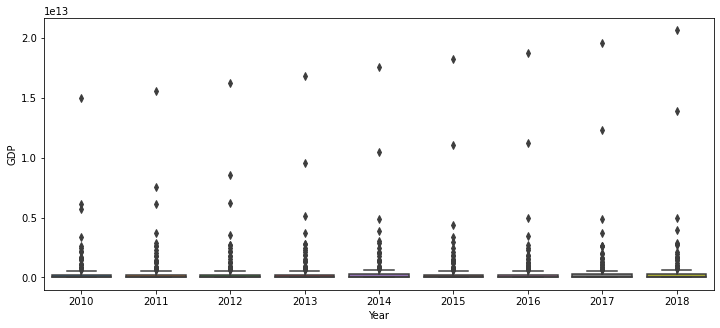

In [34]:
# boxplot represenation of year by GDP
plt.figure(figsize=(12,5))
sb.boxplot(data=gdp_year, x='Year', y='GDP');

From the above, it is clear that maximum GDP outliers continues to grow indicating that just a few countries are experiencing rapid economic growth. I will change the y axis above to a log scale so that the plot can be seen clearly.

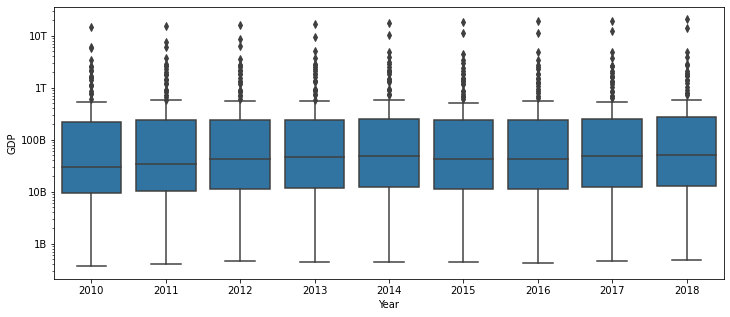

In [35]:
# use a log scale for the GDP axis
plt.figure(figsize=(12,5))

sb.boxplot(data=gdp_year, x='Year', y='GDP', color=base_color);

plt.yscale('log') 
plt.yticks([ 10**9, 10**10, 10**11, 10**12, 10**13], ['1B', '10B', '100B', '1T', '10T']);

From 2010 to 2014, there was a steady rise in the median GDP. The highest maximum GDP was recorded in 2014. In 2015, a drop can be seen in the maximum and median values of GDP but the minimum value was not really affected. The GDP rose again in 2017.  It will be good to understand why the drop happened. I will explore this more in multivariate analysis by checking GDP, Year and one or more of the varaibles that affect GDP.

### What is the distribution of Income Class and Regions based on GDP, Population?

In [36]:
def violingrid(x, y, **kwargs):
    """ plots a violin plot using PairGrid. """
    sb.violinplot(x, y, color=base_color, inner=None)
    plt.xscale('log');

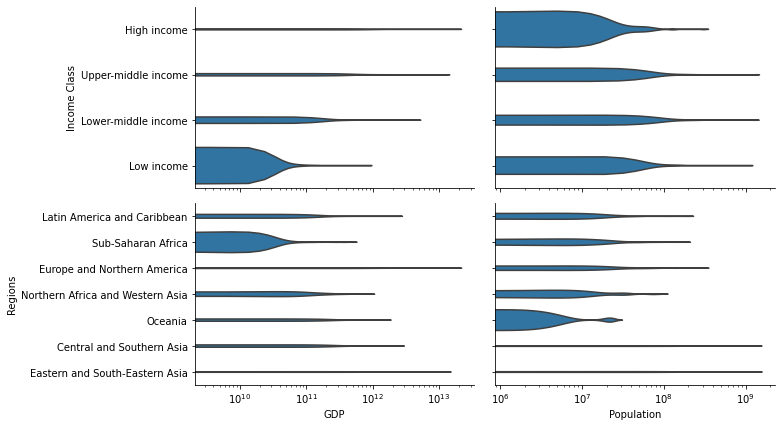

In [37]:
# call the function
# the regions have different orders for GDP and Population so no order was plotted
categorical_vars = ['Income Class', 'Regions']
fig = sb.PairGrid(data=economy, x_vars = ['GDP', 'Population'], y_vars=categorical_vars,
                height = 3, aspect = 1.5)
fig.map(violingrid);

Starting from the top left: the GDP from high income to low income gradually reduces. There are a lot of countries in the Low income category with less then 100M GDP and the highest Low income GDP being 1T. By population, high income countries have the lowest maximum population and the most points distributed between 1M and 100M people. This tells us that the high income countries are not as populated as the other income classes.

Comparing regions and GDP, there is a high distribution of countries in Sub-Saharan Africa with GDP less than 100B and they have the lowest maximum GDP. Europe and Northern America have the highest maximum GDP but a narrow distribution of countries. In summary, none of the violin plots appear to be normally distributed.

A better way to understand the GDP and how it is generated in the countries is to engineer the GDP Per capita feature. This is the average income gotten from each member of a country. We may then check the GDP Per capita for each income class or each region to understand why countries in the same region do not belong to the same income class.

### What is the average GDP Per capita for each Income Class?

In [38]:
# derive the GDP Per Capita for each country
economy['GDP Per Capita'] = economy['GDP'] / economy['Population']

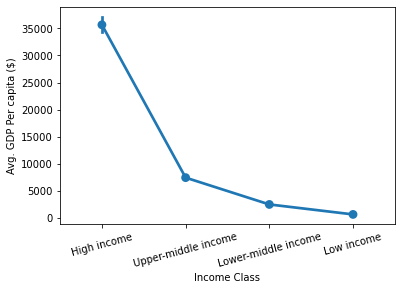

In [39]:
# use pointplot to get the means for each income class
sb.pointplot(data=economy, x= 'Income Class', y='GDP Per Capita', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. GDP Per capita ($)');            

The average income of a person located in a high income economy is 35k while that of someone located in a low income economy is less than 5k.

Finally, I would like to understand the distribution of income class by Regions.

### How many countries in each region belong to each income class?

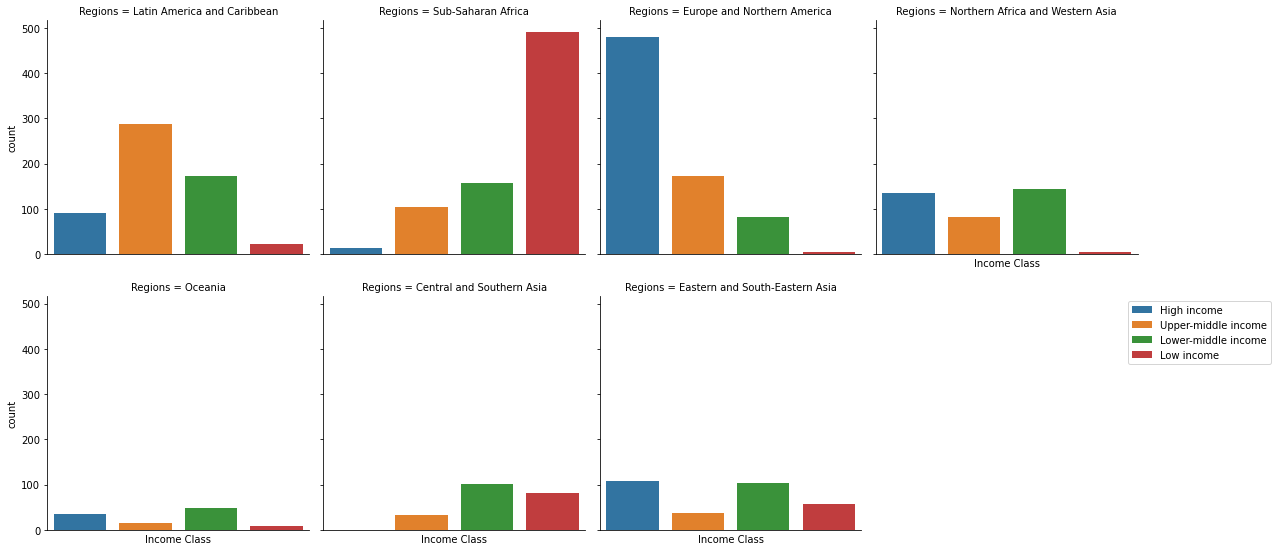

In [40]:
# without taking into account individual countries
# facetgrid to examine the count of income class for each region
fig = sb.FacetGrid(data=economy, col='Regions', hue='Income Class', col_wrap=4, height=4)
fig.map(sb.countplot, 'Income Class')
plt.xticks(rotation=15)

plt.legend(loc='upper left', bbox_to_anchor=(2,1))
plt.xticks([])
plt.tight_layout()
plt.show()

In [41]:
# to see the exact counts involved, I will use a heat map
# group by region and income class to get the counts
region_income = economy.groupby(['Regions', 'Income Class']).size().reset_index(name='count')
region_income = region_income.pivot(index='Regions', columns='Income Class', values='count')
region_income

Income Class,High income,Upper-middle income,Lower-middle income,Low income
Regions,,,,
Central and Southern Asia,0,32,102,82
Eastern and South-Eastern Asia,108,37,103,57
Europe and Northern America,479,172,82,5
Latin America and Caribbean,91,287,172,22
Northern Africa and Western Asia,135,82,145,5
Oceania,36,16,48,8
Sub-Saharan Africa,13,105,157,492


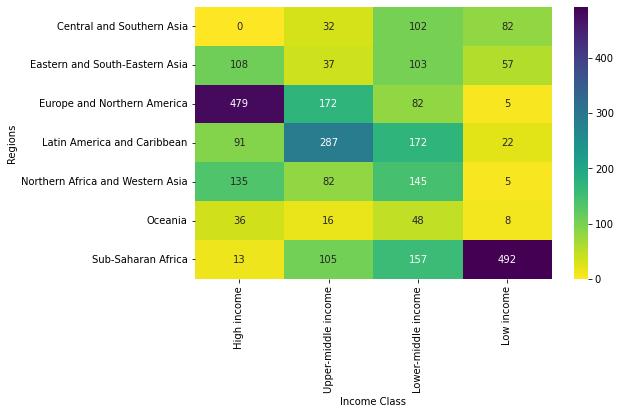

In [42]:
# heatmap for income class by region
plt.figure(figsize=(8,5))
sb.heatmap(region_income, annot=True, fmt='d', cmap='viridis_r');

For the period that the data was collected, the count of high income observations was the highest and this makes the world seem like a genrally high income place. There are more high income earners in Europe and Northern America and more low income earners in Sub-saharan Africa.

### Conclusion
<a name="bivariate-conclusion"></a>
###  Relationships observed in this part of the investigation. How the feature(s) of interest vary with other features in the dataset

> It was strange to see no correlation between GDP and exports/natural resources. Infact, GDP had negative or zero correlation with the items that were supposed to contribute to it. The negative correlation may be explained by the theory called the **paradox of plenty theory** which states that a country may focus on exporting just one produce which is not a value added export while negelecting other sectors of its economy and then decrease its GDP. 

###  Interesting relationships between the other features

> There was a positive correlation between exports and imports. And it was odd to see no correlation between natural resources and exports. Does this mean that countries exported only finished goods?  I also observed that population constantly increased with Year.

## Multivariate Exploration
<a id="optparam"></a>

From the correlation map in the bivariate analysis, GDP had a positive correlation with Population and a negative correlation with Imports. I will check if this explains the rise and fall of GDP from 2010 to 2018.

### What effect did imports have on GDP from 2010?

In [43]:
# subset the data for the years from 2010
gdp_data = economy[(economy['Year'] >= 2010)]

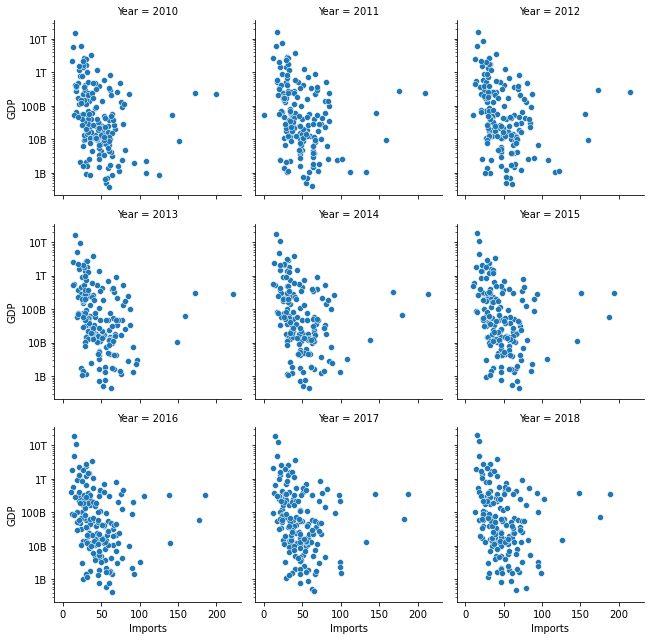

In [44]:
# use facetgrid and scatterplot to find the relation between GDP and imports and use Year to create column groups
fig = sb.FacetGrid(data=gdp_data, col='Year', col_wrap=3, height=3, aspect=1)
fig.map(sb.scatterplot, 'Imports', 'GDP')

plt.yscale('log')
plt.yticks([10**9, 10**10, 10**11, 10**12, 10**13], ['1B', '10B', '100B', '1T', '10T']);

This relationship between GDP and imports appear constant throughout 2010 and 2018. It is not conclusive that an increase in imports might have caused the fall of the GDP. To further examine this, we would have to consider other variables that GDP had a negative correlation. But since the correlations were all weak, it is very likely that there will also be no conclusive insights. 


### What effect did Population and GDP have on the other features from 2010?

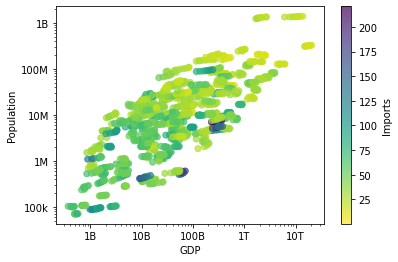

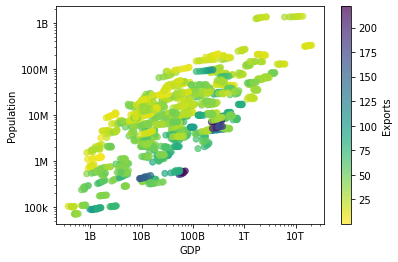

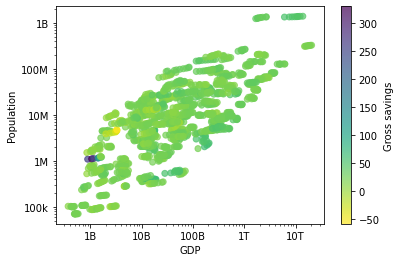

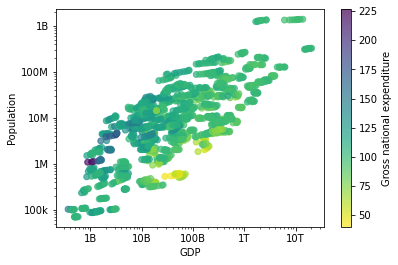

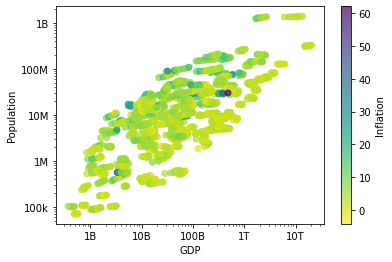

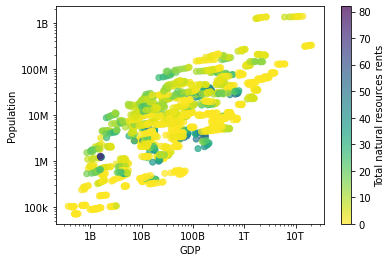

In [45]:
# scatter plot to see how the other features vary with GDP and Population. 
features=['Imports', 'Exports', 'Gross savings', 'Gross national expenditure', 'Inflation',
          'Total natural resources rents']
for feature in features: 
    plt.scatter(data=gdp_data,  x='GDP', y='Population', c=feature, cmap='viridis_r', alpha=0.7)
    plt.xscale('log')
    plt.yscale('log')
    
    plt.colorbar(label=feature)
    plt.xlabel('GDP')
    plt.ylabel('Population')
    plt.xticks([10**9, 10**10, 10**11, 10**12, 10**13], ['1B', '10B', '100B', '1T', '10T'])
    plt.yticks([10**5, 10**6, 10**7, 10**8, 10**9], ['100k', '1M', '10M', '100M', '1B'])
    
    plt.show()

Imports is low when the GDP and Population are high. The highest values of imports lie between the 100B and 1T GDP range and 1M and 10M Population range. For exports, there are more low values spread around. Highest export points can be seen around the 10B-500B GDP range suggesting that high GDP and high exports have things in common (contrary to the numeric heatmap seen earlier). The low export points are spread around high population and low GDP. Generally, there are more low export points than there are low import points.

As Population and GDP increases, Gross savings appears to also increase. The highest and lowest savings were recorded in the range of the low GDP around 1B-5B. The common range of savings was 50%GDP.

Gross national expendtiure appears to be generally high than that of Savings. Most of the highest expenditure points are concentrated around the areas of low GDP (less than 100B). Expenditure appears to increase with population but decrease with GDP

Inflation looks generally low and appears to be somewhat constant with a couple of high points. Total natural resources is generally low but has some high points spread around. 

I will now use the entire data to examine how these numeric features are distributed by income class and regions.

### How are GDP and Population related with Income Class and Regions? 

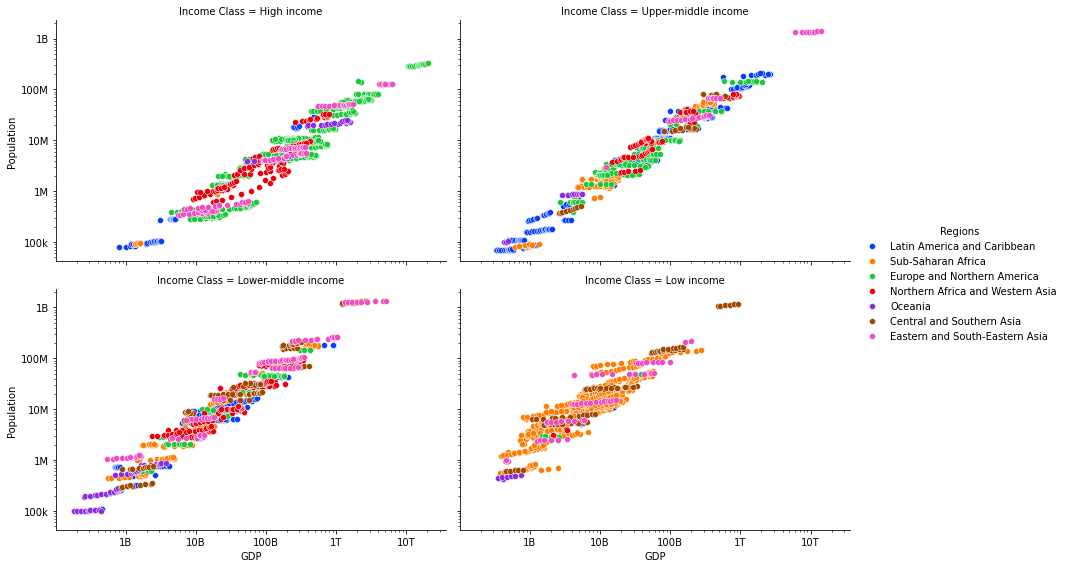

In [46]:
# use facetgrid with income class as columns and regions as hue 
fig = sb.FacetGrid(data=economy, col='Income Class', col_wrap=2, hue='Regions',
                 height=4, aspect=1.5, palette='bright')
fig.map(sb.scatterplot, 'GDP', 'Population', x_jitter=0.5)

plt.xscale('log')
plt.yscale('log')
fig.add_legend()

plt.xticks([10**9, 10**10, 10**11, 10**12, 10**13], ['1B', '10B', '100B', '1T', '10T'])
plt.yticks([10**5, 10**6, 10**7, 10**8, 10**9], ['100k', '1M', '10M', '100M', '1B'])

plt.xlabel('GDP')
plt.ylabel('Population');

The high income category is highly populated with points from Europe and Northern America, Eastern and South-Eastern Asia & Northern Africa and Western Asia. Scanty points can be seen for Latin America and Caribbean, Oceania and Sub_saharan Africa. There was a time when 100k indicated high income. No point is seen for Central and Southern Asia. 

The upper middle income category has fair a distribution for all region types. Similarly with the lower middle income class.

The low income class is highly populated with points from Sub_saharan Africa & Central and Southern Asia. Scanty points can be seen for Europe and Northern America, Northern Africa and Western Asia, Latin America and Caribbean & Oceania. At this category, the highest GDP is less than 1T. This shows that the income class is constantly changing with the GDP and the world GDP continues to increase.


### How are Gross national expenditure and Gross savings related with Income Class and Regions? 

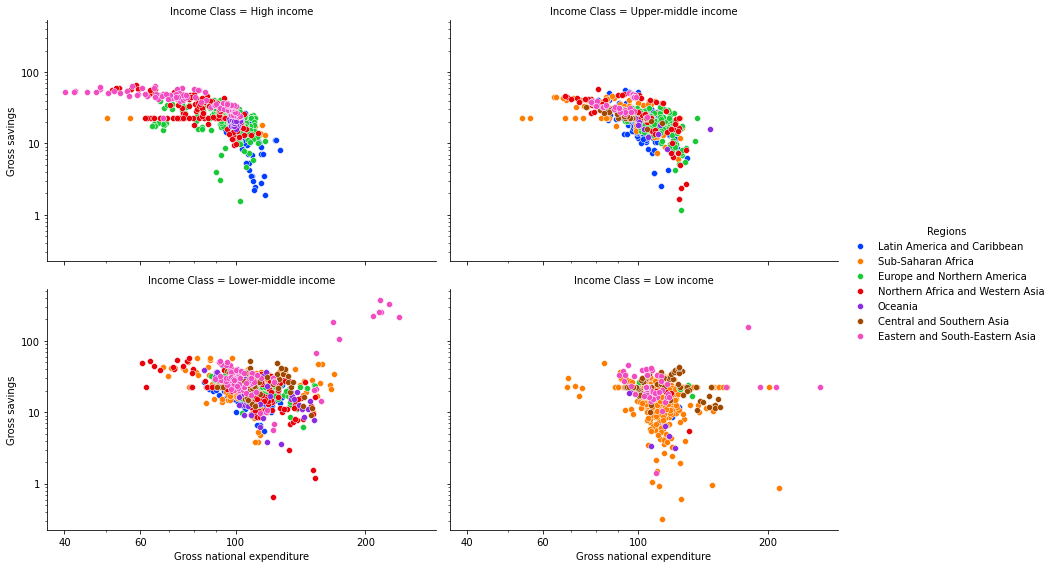

In [47]:
# use facetgrid with income class as columns and regions as hue 
fig = sb.FacetGrid(data=economy, col='Income Class', col_wrap=2, hue='Regions',
                 height=4, aspect=1.5, palette='bright')
fig.map(sb.scatterplot, 'Gross national expenditure', 'Gross savings', x_jitter=0.5)

plt.xscale('log')
plt.yscale('log')
fig.add_legend()

plt.xticks([4*10**1, 6*10**1, 10**2, 2*10**2], ['40', '60', '100', '200'])
plt.yticks([10**0, 10**1, 10**2], [1, 10, 100])

plt.xlabel('Gross national expenditure')
plt.ylabel('Gross savings')

plt.show()

For the high income class, savings and expenditure are almost equal with a few outlier points with high expenditure from Latin America and Caribbean

For the lower middle income category, expenditure is slightly higher than savings. Some points in Eastern and South-Eastern Asia have outstandingly high savings and high expenditure.

For the low income category, expenditure tends to be higher than savings. This catgory is mainly populated with points from Sub-Saharan Africa, Central and Southern Asia and a bit of Eastern and South-Eastern Asia.

In summary, high income is characterised by equal savings and equal expenditure while low income is characterised by high savings and low expenditure.

### How are Imports and Exports related with Income Class and Regions? 

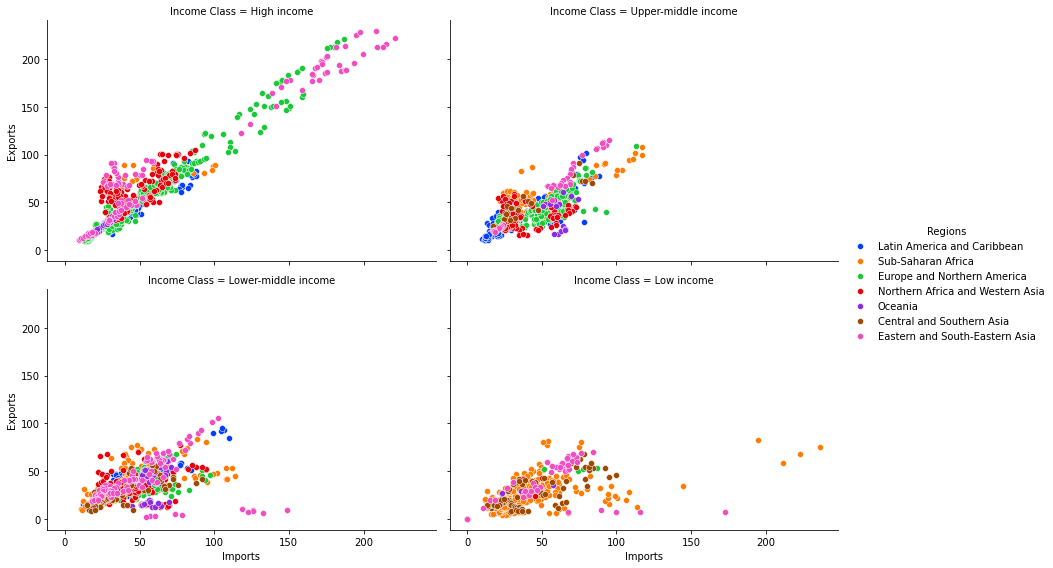

In [48]:
# use facetgrid with income class as columns and regions as hue 
fig = sb.FacetGrid(data=economy, col='Income Class', col_wrap=2, hue='Regions',
                 height=4, aspect=1.5, palette='bright')
fig.map(sb.scatterplot, 'Imports', 'Exports', x_jitter=0.5)

plt.xlabel('Imports')
plt.ylabel('Exports')

fig.add_legend()
plt.show()

For high income class, high export is associated with high imports especially in the Europe and Northern America & Eastern and South-Eastern Asia regions.

For the upper middle income class, import is slightly higher than exports and these are points in the Sub-Saharan Africa and scanty points from Europe and Northern America.

In lower middle income class, imports starts to get higher than exports especially for points in Sub-Saharan Africa, Europe and Northern America, Latin America and Caribbean.

In low income class, imports is clearly higher than exports. Regions like Europe and Northern America, Latin America and Caribbean, Northern Africa and Western Asia can barely be seen here.

This tells us that exports has to be higher than import for an economy to achieve high GDP and thus belong to high income class.

### How are Inflation and Total natural resources with Income Class and Regions? 

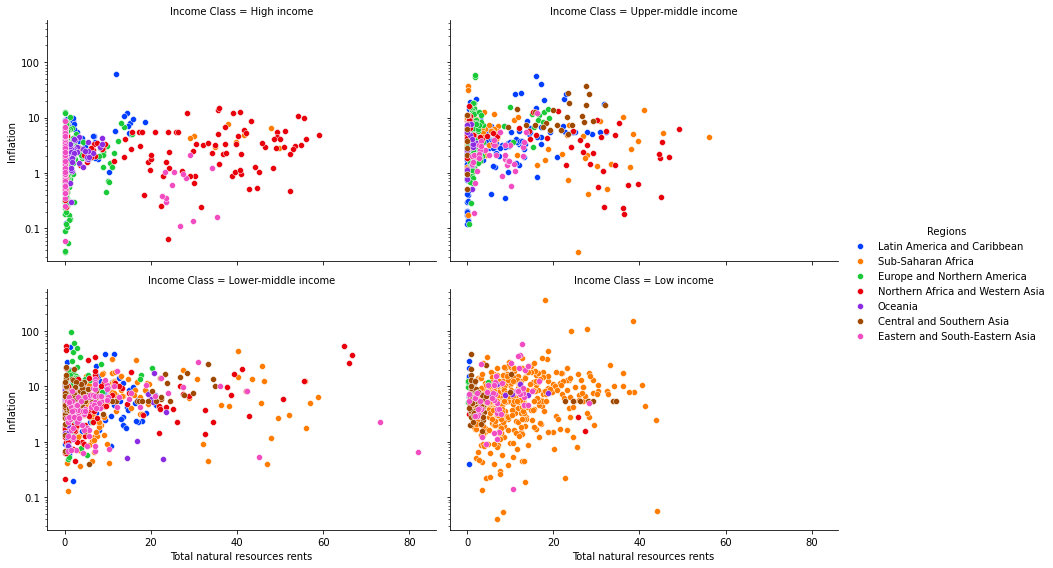

In [49]:
# use facetgrid with income class as columns and regions as hue 
fig = sb.FacetGrid(data=economy, col='Income Class', col_wrap=2, hue='Regions',
                 height=4, aspect=1.5, palette='bright')
fig.map(sb.scatterplot, 'Total natural resources rents', 'Inflation', x_jitter=0.5)

plt.yscale('log')
plt.yticks([10**-1, 10**0, 10**1, 10**2], [0.1, 1, 10, 100])
plt.xlabel('Total natural resources rents')
plt.ylabel('Inflation')

fig.add_legend()
plt.show()

Inflation and total natural resources are related in the sense that inflation affects the price at which natural resources produced in a country will be sold. As the income class goes from high to low, inflation increases from 0 to 100% of GDP. The highest inflation value is in the low income class while the lowest inflation value is in both the high and low income class.

Lower middle income class seems to benefit from natural resources in regions like Northern Africa and Western Asia & Eastern and South-Eastern Asia regions.

### How does GDP Per Capita vary by Income Class and Regions? 

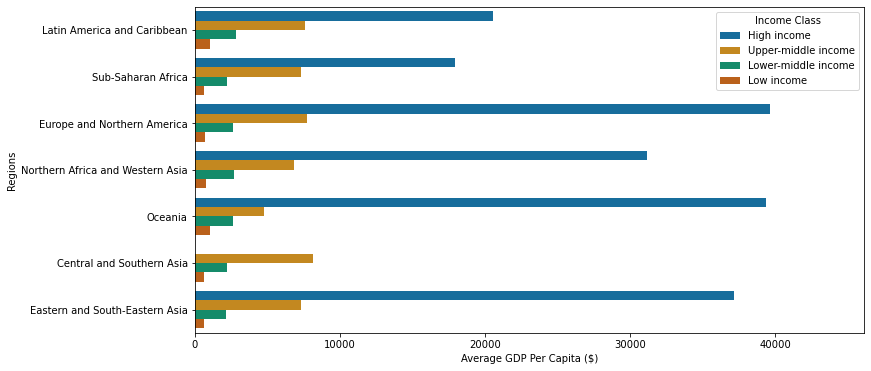

In [50]:
plt.figure(figsize=(12,6))
sb.barplot(data=economy, y='Regions', x='GDP Per Capita', hue='Income Class', errwidth=0,
           palette='colorblind'); 
plt.xlabel('Average GDP Per Capita ($)');

Oceania is the region with the second highest GDP Per Capita despite having the lowest number of observations in the dataset. Conversly, Eastern and South-Eastern Asia is the region with the the highest population observations but and it has the third highest GDP Per Capita. This shows that high GDP is not entirely dependent on increase in population.

If a country produces a high GDP and it has a small population, it would have a high GDP Per Capita which may be the case of the countries in the Oceania region.

The average GDP Per Capita for the income classes have a close range excluding the high income class. 

### Conclusion
<a name="multivariate-conclusion"></a>

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> GDP and Population had a positive correlation but there were other factors that prevented GDP from increasing with population. Some of the regions with the highest population did not have the highest GDP.  

### Were there any interesting or surprising interactions between features?
> By examining the other features, high income class was associated with gross national expenditure not exceeding savings and exports not exceeding imports. Inflations values were also kept really low at 1% rate. 

## Conclusions
<a id="optparam"></a>

> The initial hypothesis was that high population would increase GDP but in 2015 GDP fell while Population increased. The GDP quickly recovered in 2017 and has increased ever since. The maximum GDP also continues to increase yearly.
>
> As a whole, the correlation between GDP and exports followed the paradox of plenty theory (negative correlation) but by only examining how import and exports affected GDP by income classes, it obeyed the export-led growth (positive correlation). High income classes had less imports and more exports.
>
> The world generally spends more on imports than exports. The income accrued from total natural resources is relatively small.
>
> Finally, the difference between the average GDP per Capita for high and upper middle income class is over a 100%. 


## Limitations
> The dataset is outdated. I found out much later that I could have compiled a recent data from World bank.
>
> The dataset does not completely include all the countries in the world. Some features were missing for the countries that were present and I had to fill them with corresponding mean values. 